In [1]:
# We will be importing 2 libraries pandas and seaborn
import pandas as pd
import seaborn as sns

In [2]:
#We are importing the dataset and storing it in folder train and test
print(pd)

<module 'pandas' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>


In [3]:
# Importing the dataset
train=pd.read_csv(r"C:\Users\M1056291\Downloads\train_s3TEQDk.csv")
test=pd.read_csv(r"C:\Users\M1056291\Downloads\test_mSzZ8RL.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


<AxesSubplot:>

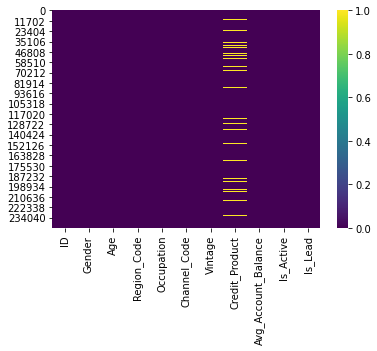

In [5]:
# Display how many null values are there in training datasets

sns.heatmap(train.isnull(),cmap='viridis')

In [6]:
# We will count how perecntage of missing values
features_with_na = [features for features in train.columns if train[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')

<IPython.core.display.Javascript object>

Credit_Product 0.1193  % missing values


# Expolatory Data Analysis

Lets us do some expolatory data analysis
Lets Visualize the count of Is_Lead with countplot
Here we can see the number of zeroes are more than number of 1s.
Means more person are not likely to buy credit card.

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

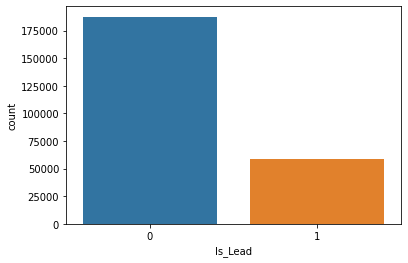

In [7]:
sns.countplot(x="Is_Lead",data=train)

Lets Visualize the count of Is_Lead with countplot with respect to Gender
As we can see here Male are more in count of both 0's and 1's.
So male are more likely not to buy credit card and buy credit card as well.

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

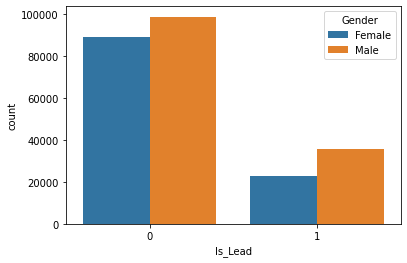

In [8]:
sns.countplot(x="Is_Lead",hue="Gender",data=train)

Lets Visualize the count of Is_Lead with countplot with respect to Occupation
As we can see here the self employed person are more likely to buy a credit card.

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

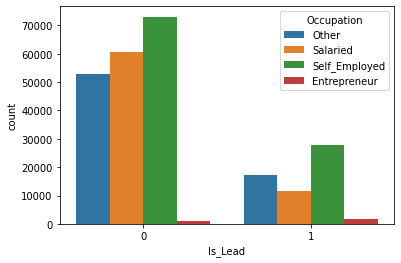

In [9]:
sns.countplot(x="Is_Lead",hue="Occupation",data=train)

Lets Visualize the count of Is_Lead with countplot with respect to channel code
As we can see here the person with X1 channel code are more likely not to buy a credit card.

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

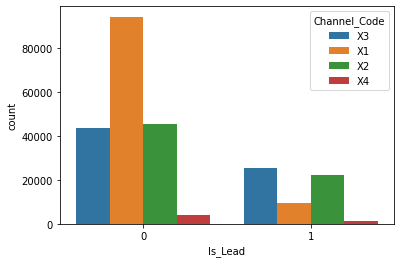

In [10]:
sns.countplot(x="Is_Lead",hue="Channel_Code",data=train)

Lets Visualize the count of Is_Lead with countplot with respect to person is active or not.
As we can see here the person who are not active code are more likely  to buy a credit card and not to buy a credit card as well.

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

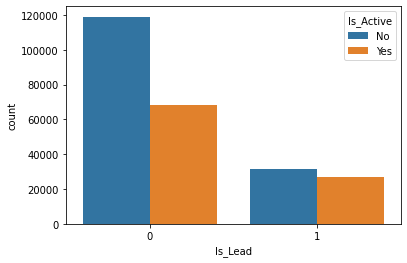

In [11]:
sns.countplot(x="Is_Lead",hue="Is_Active",data=train)

Lets Visualize the count of Is_Lead with countplot with respect to credit product.


<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

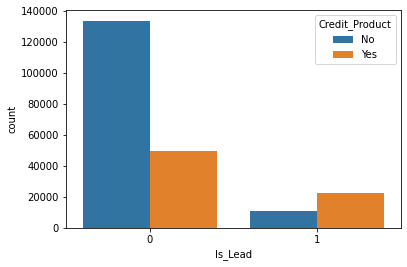

In [12]:
sns.countplot(x="Is_Lead",hue="Credit_Product",data=train)

Now we will calculate the total number of ID present in training datasets.

In [13]:
print("Total no of id is {}".format(len(train.ID)))

Total no of id is 245725


LETS gather some unformation about numerical variables.
Here we can see there are four numerical variables.

In [14]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()
print(numerical_features)

Number of numerical variables:  4
['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']


As we know there are two type of numerical variable :Continous and Discrete.
In the next two step we will be displaying continous and discrete feature.

In [15]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 1
['Is_Lead']


In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 3
['Age', 'Vintage', 'Avg_Account_Balance']


In this step we will be displaying the histogram of continous features to oberve the distirbution.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

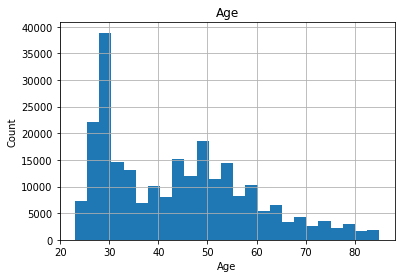

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

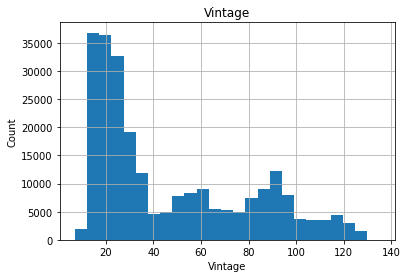

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

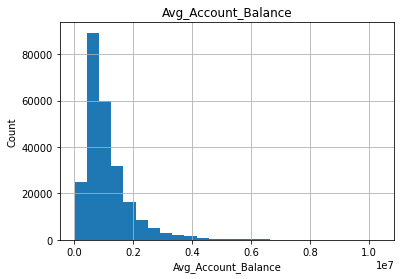

In [17]:
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In this step we will be displaying the outliers with the help of boxplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

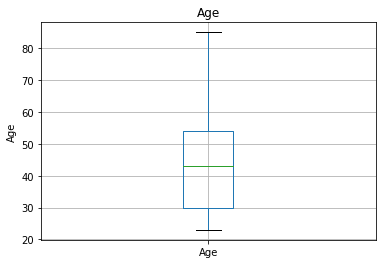

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

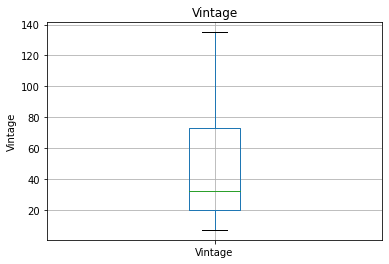

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

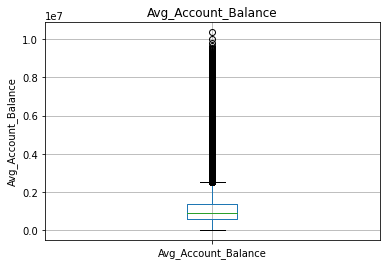

In [18]:
for feature in continuous_feature:
    train=train.copy()
    if 0 in train[feature].unique():
        pass
    else:
        train.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Now lets deal with categorical feature.
We will display the details and number of categorical feature in the very next three step.

In [19]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O']
categorical_features

['ID',
 'Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [20]:
train[categorical_features].head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,NNVBBKZB,Female,RG268,Other,X3,No,No
1,IDD62UNG,Female,RG277,Salaried,X1,No,No
2,HD3DSEMC,Female,RG268,Self_Employed,X3,No,Yes
3,BF3NC7KV,Male,RG270,Salaried,X1,No,No
4,TEASRWXV,Female,RG282,Salaried,X1,No,No


In [21]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is ID and number of categories are 245725
The feature is Gender and number of categories are 2
The feature is Region_Code and number of categories are 35
The feature is Occupation and number of categories are 4
The feature is Channel_Code and number of categories are 4
The feature is Credit_Product and number of categories are 3
The feature is Is_Active and number of categories are 2


Now lets do some feature engineering.
We can replace the null values with missing values.

In [22]:
train["Credit_Product"]=train["Credit_Product"].fillna('Missing')
test["Credit_Product"]=test["Credit_Product"].fillna('Missing')

<AxesSubplot:>

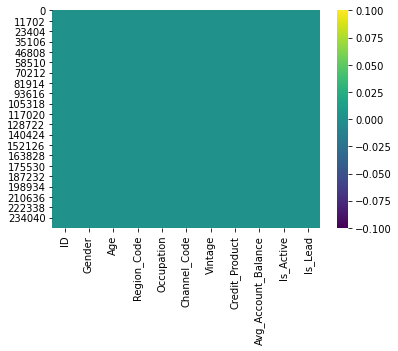

In [23]:
sns.heatmap(train.isnull(),cmap='viridis')

<AxesSubplot:>

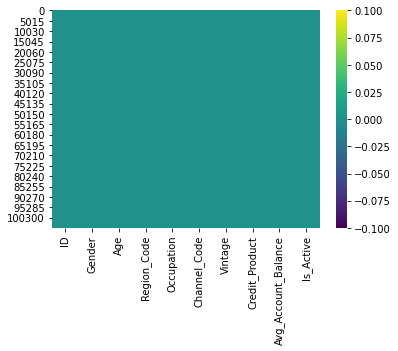

In [24]:
sns.heatmap(test.isnull(),cmap='viridis')

We will drop the ID column from both training and test data and it dosent impact our target variable that is Is Lead.

In [25]:
# Dropping ID column
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

We will drop the Region column from both training and test data and it dosent impact our target variable that is Is Lead.

In [26]:
# Dropping region code
train.drop('Region_Code',axis=1,inplace=True)
test.drop('Region_Code',axis=1,inplace=True)

In [27]:
train

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,Other,X3,43,No,1045696,No,0
1,Female,30,Salaried,X1,32,No,581988,No,0
2,Female,56,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,Salaried,X1,19,No,470454,No,0
4,Female,30,Salaried,X1,33,No,886787,No,0
5,Male,56,Self_Employed,X1,32,No,544163,Yes,0
6,Male,62,Other,X3,20,Missing,1056750,Yes,1
7,Female,48,Self_Employed,X3,13,No,444724,Yes,0
8,Female,40,Self_Employed,X2,38,No,1274284,No,0
9,Female,55,Self_Employed,X2,49,Yes,2014239,No,0


In [28]:
test

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,Other,X1,25,Yes,742366,No
1,Male,43,Other,X2,49,Missing,925537,No
2,Male,31,Salaried,X1,14,No,215949,No
3,Male,29,Other,X1,33,No,868070,No
4,Female,29,Other,X1,19,No,657087,No
5,Male,60,Self_Employed,X3,110,No,4624262,No
6,Female,69,Other,X2,67,No,1032764,No
7,Female,30,Salaried,X1,33,No,837009,No
8,Male,43,Salaried,X3,81,Missing,1001232,Yes
9,Female,54,Self_Employed,X2,37,Yes,1667851,No


As we know machine dosent know categorical variable so we will convert them to numerical variable and drop one cateogry to overcome dummy variable trap and will do for test dataset as well.

In [29]:
# Converting all categorical varaible to dummy variable
gender = pd.get_dummies(train['Gender'],drop_first=True)
occupation = pd.get_dummies(train['Occupation'],drop_first=True)
channel_Code = pd.get_dummies(train['Channel_Code'],drop_first=True)
credit_Product = pd.get_dummies(train['Credit_Product'],drop_first=True)
is_active      = pd.get_dummies(train['Is_Active'],drop_first=True)

In [30]:
train.drop(['Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1,inplace=True)

In [31]:
train = pd.concat([train,gender,occupation,channel_Code,credit_Product,is_active],axis=1)

In [32]:
train

,Age,Vintage,Avg_Account_Balance,Is_Lead,Male,Other,Salaried,Self_Employed,X2,X3,X4,No,Yes,Yes
0,73,43,1045696,0,0,1,0,0,0,1,0,1,0,0
1,30,32,581988,0,0,0,1,0,0,0,0,1,0,0
2,56,26,1484315,0,0,0,0,1,0,1,0,1,0,1
3,34,19,470454,0,1,0,1,0,0,0,0,1,0,0
4,30,33,886787,0,0,0,1,0,0,0,0,1,0,0
5,56,32,544163,0,1,0,0,1,0,0,0,1,0,1
6,62,20,1056750,1,1,1,0,0,0,1,0,0,0,1
7,48,13,444724,0,0,0,0,1,0,1,0,1,0,1
8,40,38,1274284,0,0,0,0,1,1,0,0,1,0,0
9,55,49,2014239,0,0,0,0,1,1,0,0,0,1,0


In [33]:
gender_test = pd.get_dummies(test['Gender'],drop_first=True)
occupation_test = pd.get_dummies(test['Occupation'],drop_first=True)
channel_Code_test = pd.get_dummies(test['Channel_Code'],drop_first=True)
credit_Product_test = pd.get_dummies(test['Credit_Product'],drop_first=True)
is_active_test     = pd.get_dummies(test['Is_Active'],drop_first=True)

In [34]:
test.drop(['Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1,inplace=True)

In [35]:
test = pd.concat([test,gender_test,occupation_test,channel_Code_test,credit_Product_test,is_active_test],axis=1)

In [36]:
test

,Age,Vintage,Avg_Account_Balance,Male,Other,Salaried,Self_Employed,X2,X3,X4,No,Yes,Yes
0,29,25,742366,1,1,0,0,0,0,0,0,1,0
1,43,49,925537,1,1,0,0,1,0,0,0,0,0
2,31,14,215949,1,0,1,0,0,0,0,1,0,0
3,29,33,868070,1,1,0,0,0,0,0,1,0,0
4,29,19,657087,0,1,0,0,0,0,0,1,0,0
5,60,110,4624262,1,0,0,1,0,1,0,1,0,0
6,69,67,1032764,0,1,0,0,1,0,0,1,0,0
7,30,33,837009,0,0,1,0,0,0,0,1,0,0
8,43,81,1001232,1,0,1,0,0,1,0,0,0,1
9,54,37,1667851,0,0,0,1,1,0,0,0,1,0


Now we will drop IS lead column from final dataset to prepare final training datasets and prepare target variable as well.

In [37]:
X_train=train.drop('Is_Lead',axis=1)

In [38]:
y_train=train['Is_Lead']

In [39]:
X_test= test.copy()

We will do some faeture scaling.

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


We will make our Neural Network 
We will be using Artifical neural network.

In [42]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=50, kernel_initializer="he_uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.


We will fit our training data and target variable to the classifier.

In [43]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 164635 samples, validate on 81090 samples
Epoch 1/10
164635/164635 [==============================] - 22s 131us/step - loss: 0.3639 - accuracy: 0.8516 - val_loss: 0.3527 - val_accuracy: 0.8586
Epoch 2/10
164635/164635 [==============================] - 21s 127us/step - loss: 0.3547 - accuracy: 0.8562 - val_loss: 0.3506 - val_accuracy: 0.8598
Epoch 3/10
164635/164635 [==============================] - 21s 130us/step - loss: 0.3525 - accuracy: 0.8575 - val_loss: 0.3511 - val_accuracy: 0.8561
Epoch 4/10
164635/164635 [==============================] - 21s 130us/step - loss: 0.3508 - accuracy: 0.8576 - val_loss: 0.3486 - val_accuracy: 0.8583
Epoch 5/10
164635/164635 [==============================] - 21s 125us/step - loss: 0.3499 - accuracy: 0.8581 - val_loss: 0.3463 - val_accuracy: 0.8614
Epoch 6/10
164635/164635 [==============================] - 20s 124us/step - loss: 0.3488 - accuracy: 0.8583 - val_loss: 0.3455 - val_accuracy: 0.8608
Epoch 7/10
164635/164635 [=================

# Summarize history for accuracy

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

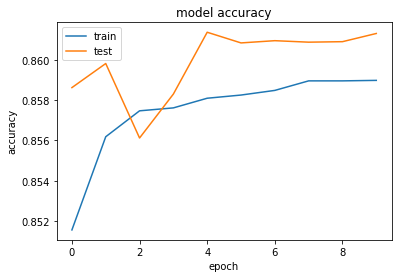

In [44]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

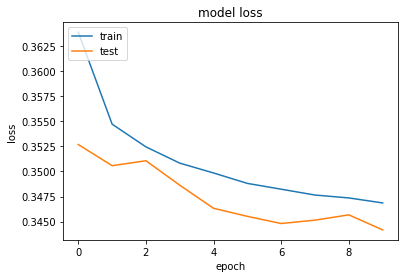

In [45]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Now we will predict the values on testing data.

In [46]:
y_pred = classifier.predict(X_test)

In [47]:
y_pred

array([[0.04058519],
       [0.91132367],
       [0.04213253],
       ...,
       [0.09670901],
       [0.13839456],
       [0.04438412]], dtype=float32)

In [48]:
y_pred

array([[0.04058519],
       [0.91132367],
       [0.04213253],
       ...,
       [0.09670901],
       [0.13839456],
       [0.04438412]], dtype=float32)

In [49]:
submission_format =pd.read_csv(r"C:\Users\M1056291\Downloads\sample_submission.csv")

In [50]:
submission_format

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
5,MZZAQMPT,0
6,Y88TW36I,0
7,3UGOAQNU,0
8,VVUKMUJT,0
9,9R363ZXS,0


Now we will append the predicted value to submission.

In [51]:
submission_id = submission_format["ID"]

In [52]:
evaluation = submission_id.to_frame()
evaluation["Is_Lead"] =y_pred
evaluation[:10]

,ID,Is_Lead
0,VBENBARO,0.040585
1,CCMEWNKY,0.911324
2,VK3KGA9M,0.042133
3,TT8RPZVC,0.014765
4,SHQZEYTZ,0.012463
5,MZZAQMPT,0.085912
6,Y88TW36I,0.075682
7,3UGOAQNU,0.040932
8,VVUKMUJT,0.981192
9,9R363ZXS,0.165791


In [53]:
evaluation.to_csv(r"C:\Users\M1056291\Downloads\New folder\demo.csv",index=False)